In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os
import jax
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from jax.typing import ArrayLike

#sys.path.append("JohnnyBotSimulator.")


# Dynamically determine the path to the JohnnyBotSimulator directory
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from PNT_Estimation import PNT_Estimation
from Dilution_of_Precision import DilutionOfPrecision
from Plotting.Estimation_plotting import EstimationPlotting




Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Maximum iterations reached without convergence.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent.
Singular matrix encountered during gradient descent

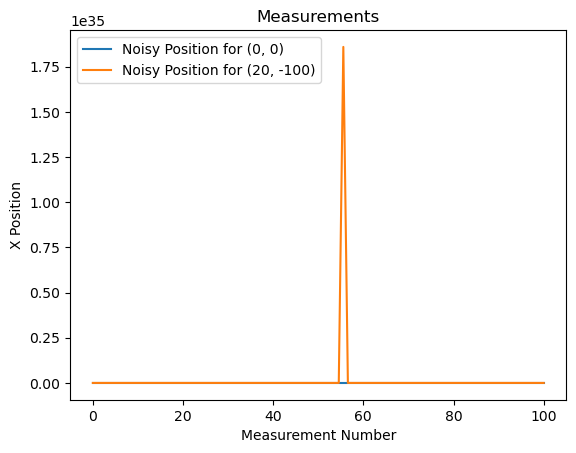

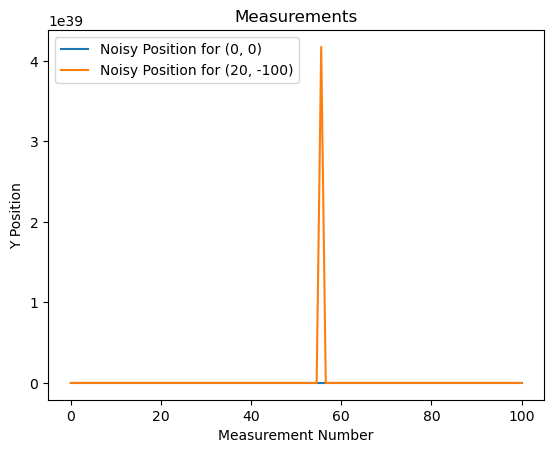

In [3]:

def get_nosisy_measurements(position, sensors):
   
    estimator = PNT_Estimation(sensors)
    estimator.max_iterations = 1000

    #position = np.array([5,5,0])
    initial_guess = np.array([0, 0, 0])
    results = estimator.estimate_positions(position, initial_guess, 100)

    results = np.stack(results).T
    return results



sensors = np.array([
    [0, 10, 20],     # Bottom-left-front corner
    [20, 20, 10],    # Bottom-right-front corner
    [15, -20, 10],   # Top-left-back corner
    [-15, 10, 15]   # Top-right-back corner
])

positions = [
    [0, 0, 0],       # Bottom-left-front corner
    [20, -100, 0]      # Bottom-right-front corner
    #[10, -20, 0],    # Top-left-back corner
    #[-10, 0, 0]     # Top-right-back corner
]

mult =10

sensors = np.array([[0, 2.032*mult, 1.00965*mult],      
                                      [1.4351*mult, -2.1463*mult, 0.4138*mult],  
                                      [-1.6762*mult,  0, 1.9431*mult]] )

combined_results = []
i = 0
for posistion in positions:
    #print("Position: ", posistion)
    results = get_nosisy_measurements(posistion, sensors)
    #print("Results: ", results)
    combined_results.append(results)


plotter = EstimationPlotting()
#print(results)
plotter.true_position = positions
plotter.noisy_positions = combined_results


#print("Noisy positions: ", results[:][0])




linespace = np.linspace(0, 100, 100)
plotter.measurement_number = linespace
plotter.plot_measurements_X()
plotter.plot_measurements_Y()





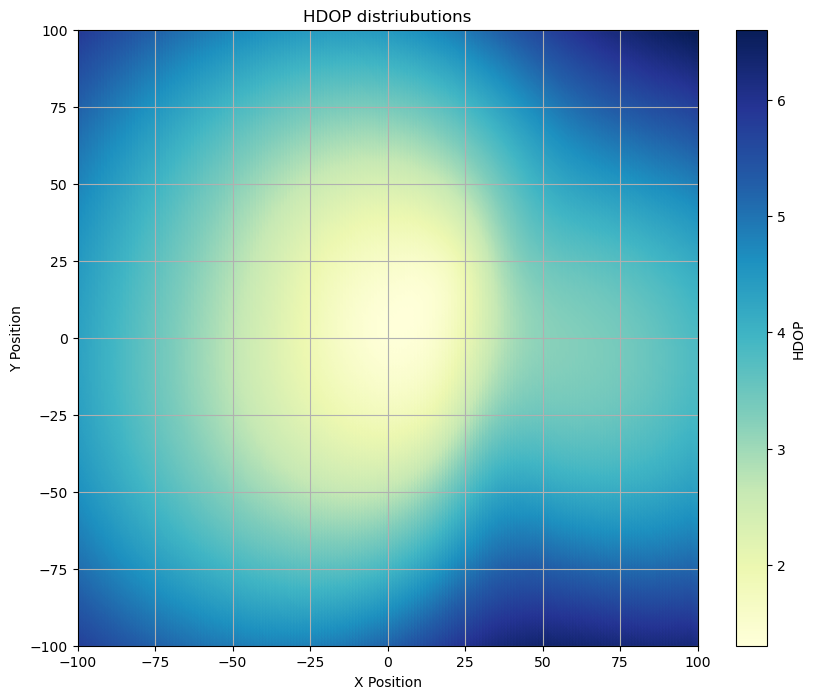

HDOP 0:  1.3584733979421555
HDOP 1:  5.781611065376518


In [5]:


x_min, x_max, y_min, y_max, z_min, z_max = -100, 100, -100, 100, -5, 20
Bounds = x_min, x_max, y_min, y_max, z_min, z_max
grid_resolution = 1.0  # Distance between grid points

# Sensor positions (example: four sensors on different walls)
'''
sensors = np.array([
    [10, 20, 10],    # Bottom-right-front corner
    [15, -10, 15],   # Top-left-back corner
    [-25, 10, 20]   # Top-right-back corner

])
'''

Dop_test = DilutionOfPrecision(sensors=sensors, bounds=Bounds, grid_resolution=grid_resolution, invert_color=False, norm=False, max_color=20)
#Dop_test.plot_hdop_2d()
Dop_test.plot_hdop_z_val()
Dop_test.plot_HDOP_Flatgrid()
_, hdop_0, _ = Dop_test.get_dop_values_at_point(positions[0])
_, hdop_1, _ = Dop_test.get_dop_values_at_point(positions[1])
print("HDOP 0: ", hdop_0)
print("HDOP 1: ", hdop_1)


Sensors:  [[  0.      20.32    10.0965]
 [ 14.351  -21.463    4.138 ]
 [-16.762    0.      19.431 ]]
Step 1 - Min HDOP: 1.4967036717087343 at (-9.5, 4.5)
Step 2 - Min HDOP: 1.5728433897355214 at (-7.5, 1.5)
Step 3 - Min HDOP: 1.7488175180191232 at (-6.5, -2.5)
Step 4 - Min HDOP: 2.148246712265775 at (-5.5, -7.5)
Step 5 - Min HDOP: 3.191577021707776 at (-4.5, -13.5)
Step 6 - Min HDOP: 7.834453555352594 at (-1.5, -24.5)
Step 7 - Min HDOP: 7.100307484936789 at (3.5, -12.5)
Step 8 - Min HDOP: 2.78694442422143 at (1.5, -18.5)
Step 9 - Min HDOP: 1.8409425163284727 at (2.5, -21.5)
Step 10 - Min HDOP: 1.509778903385813 at (3.5, -22.5)


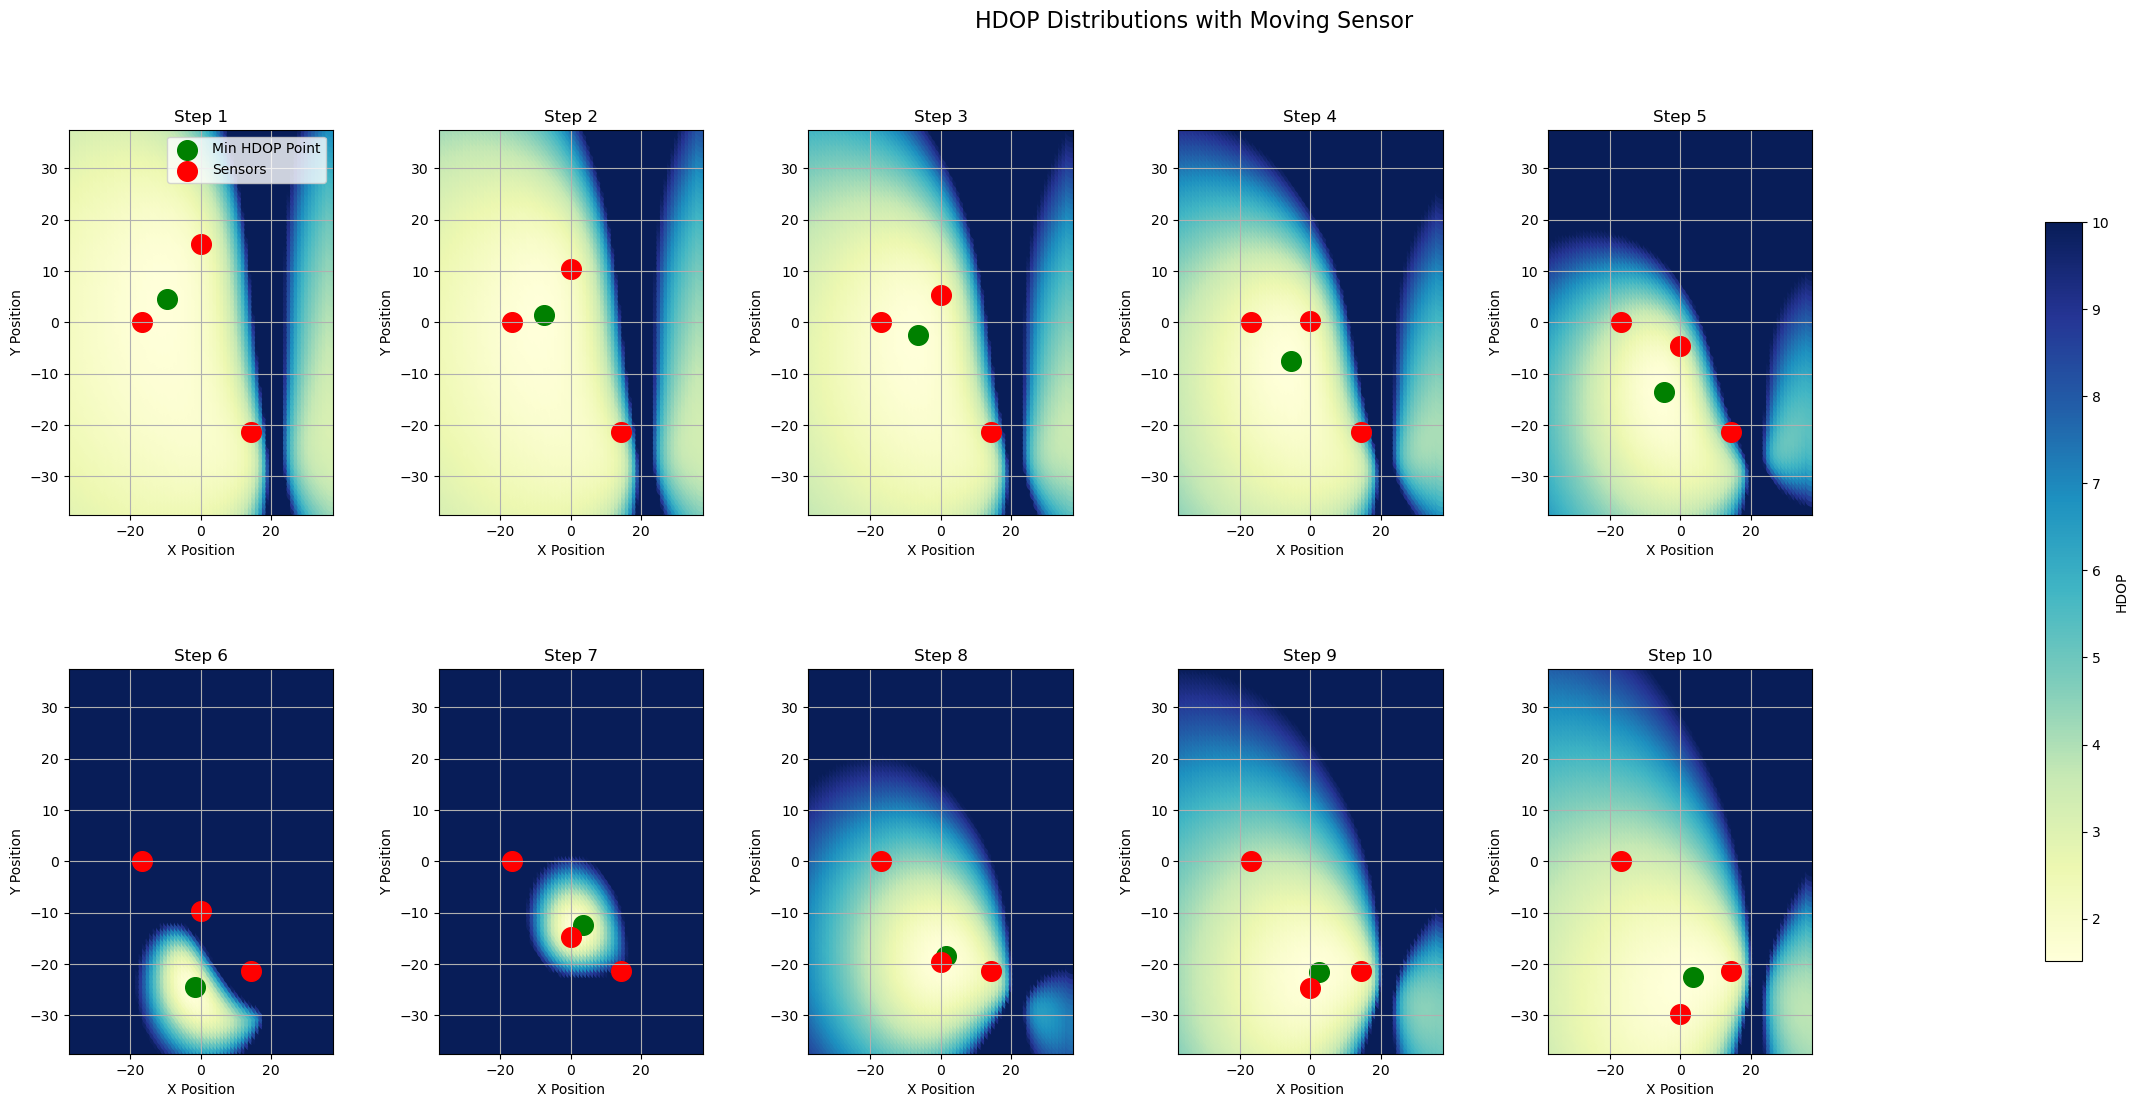

In [ ]:
def Moving_sensor(sensor, movement_matrix, steps):
    """
    Move the sensor in a straight line for a given number of steps.
    """
        
    x_min, x_max, y_min, y_max, z_min, z_max = -20, 20, -30, 30, -5, 20
    Bounds = x_min, x_max, y_min, y_max, z_min, z_max
    grid_resolution = 1.0  # Distance between grid points
    for i in range(steps):
        sensor += movement_matrix
        print("Sensor position: ", sensor)
        Dop_test = DilutionOfPrecision(sensors=sensors, bounds=Bounds, grid_resolution=grid_resolution, invert_color=False, norm=False, max_color=20)
        Dop_test.plot_hdop_2d()
        #Dop_test.plot_HDOP_Flatgrid()

bound_mult = 1.5
x_min, x_max, y_min, y_max, z_min, z_max = -25*bound_mult, 25*bound_mult, -25*bound_mult, 25*bound_mult, -5, 20
Bounds = x_min, x_max, y_min, y_max, z_min, z_max

grid_resolution = 1.0  # Distance between grid points

# Sensor positions (example: four sensors on different walls)
sensors = np.array([
    [0, 25, 0],    # Bottom-right-front corner
    [-15, -5, 5],   # Top-left-back corner
    [-15, 5, 10],   # Top-right-back corner

])

# trace 
# condition 
# volume

mult =10

sensors_real = np.array([[0, 2.032*mult, 1.00965*mult],      
                                      [1.4351*mult, -2.1463*mult, 0.4138*mult],  
                                      [-1.6762*mult,  0, 1.9431*mult]] )



print("Sensors: ", sensors_real)
Moving_matrix = np.array([[0, -5, 0],
                            [0, 0, 0],
                            [0, 0, 0]])
#Moving_sensor(sensors, Moving_matrix, 5)


dop = DilutionOfPrecision(sensors=sensors_real, bounds=Bounds, grid_resolution=grid_resolution, invert_color=False, norm=False, max_color=10)
dop.Moving_sensor(Moving_matrix, 10)

c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:56: RuntimeWarning:

invalid value encountered in sqrt

c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:57: RuntimeWarning:

invalid value encountered in sqrt

c:\Users\fatho\PythonStuff\JohnnyBot\JohnnyBotSimulator\Estimation\Dilution_of_Precision.py:58: RuntimeWarning:

invalid value encountered in sqrt



Step 1 - Min HDOP: 6.739374718594687 at (-17.0, 5.0)
Step 2 - Min HDOP: 4.330626428071992 at (-17.0, 6.0)
Step 3 - Min HDOP: 3.0065033677014226 at (-15.0, 5.0)
Step 4 - Min HDOP: 2.338678209641481 at (-14.0, 2.0)
Step 5 - Min HDOP: 2.067209340882349 at (-14.0, -1.0)
Step 6 - Min HDOP: 2.0 at (-15.0, -5.0)
Step 7 - Min HDOP: 2.0362534187599066 at (-17.0, -8.0)
Step 8 - Min HDOP: 2.112023058448205 at (-18.0, -11.0)
Step 9 - Min HDOP: 2.1978692324053233 at (-21.0, -13.0)
Step 10 - Min HDOP: 2.2843344763847515 at (-23.0, -15.0)


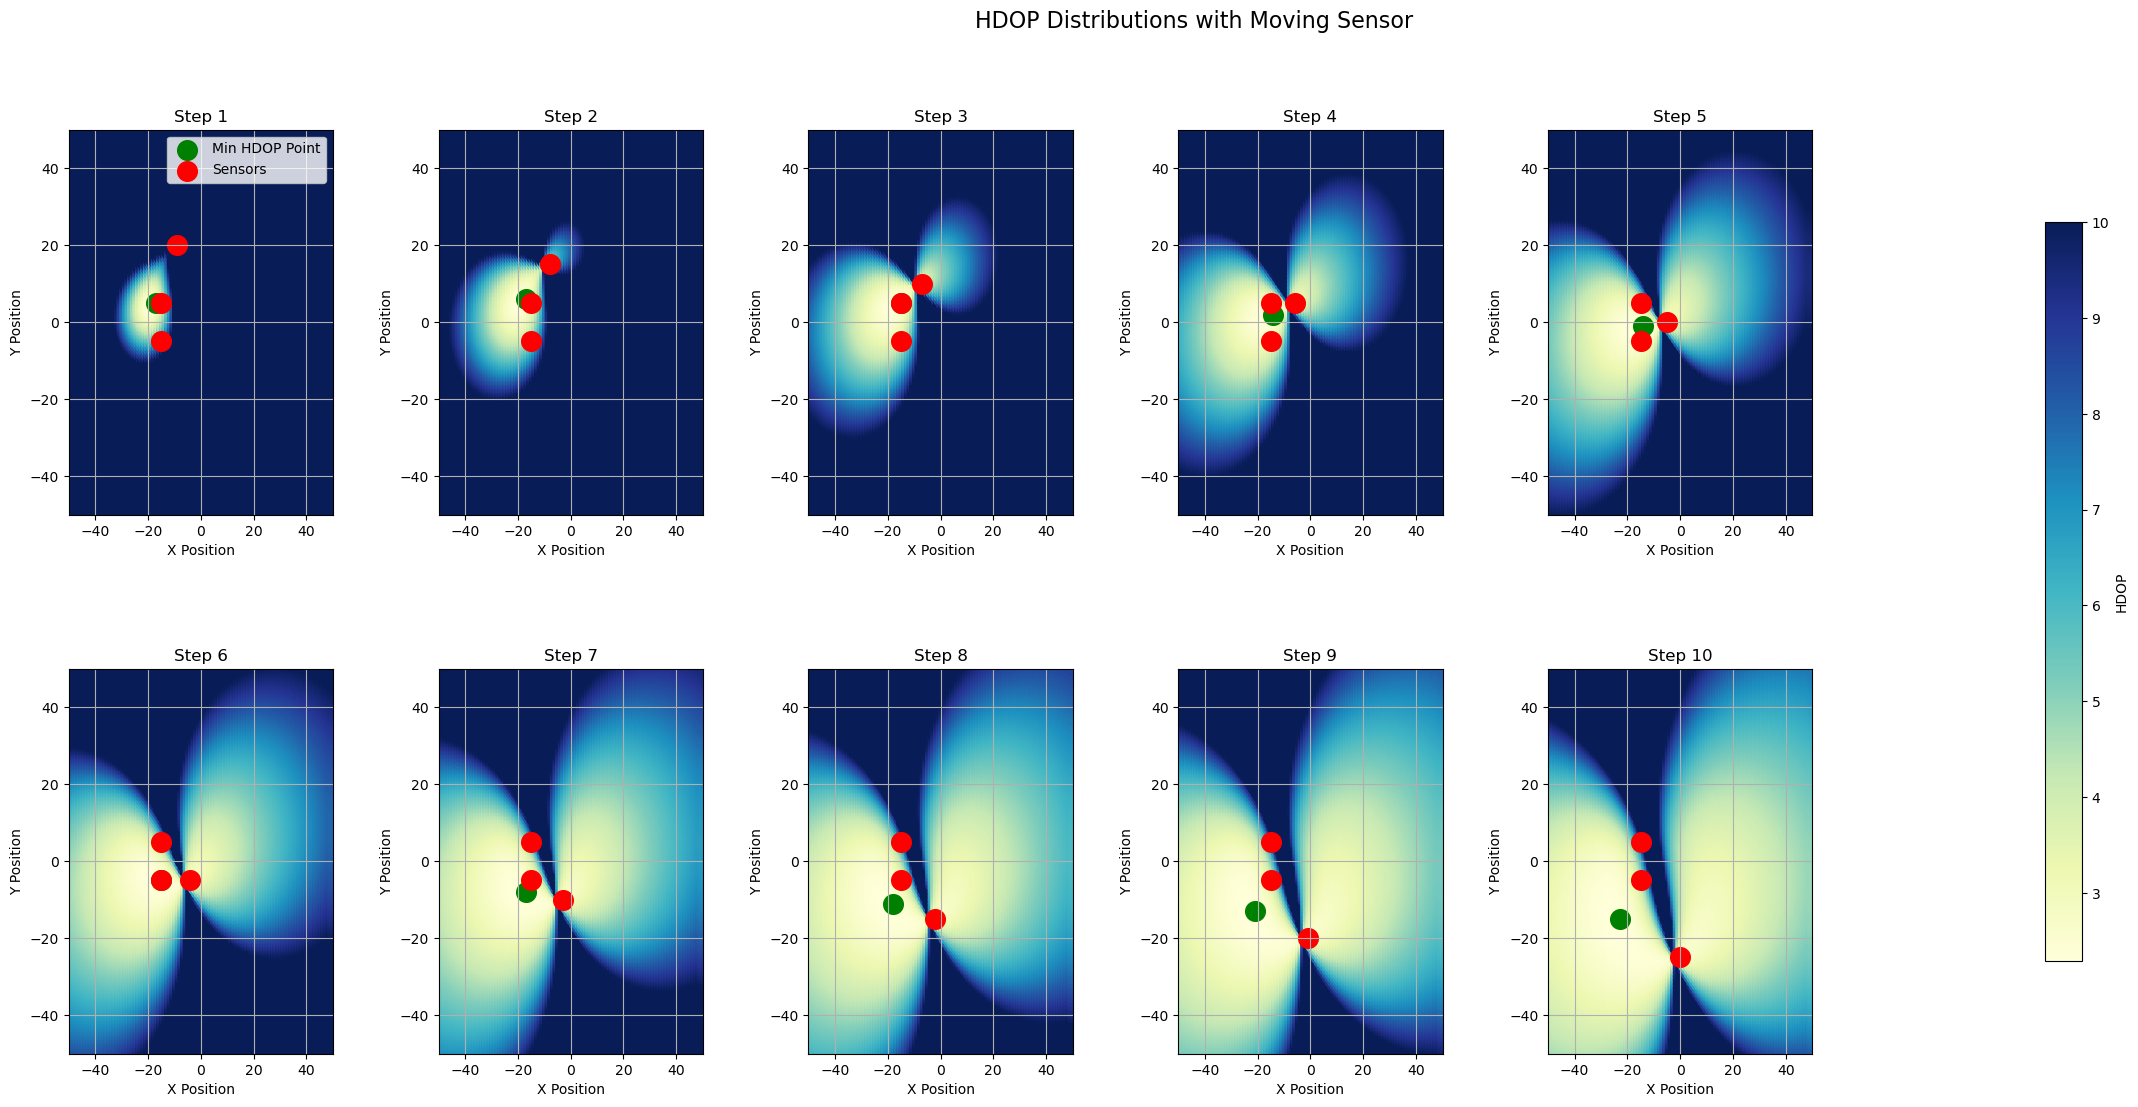

In [7]:
bound_mult = 2
x_min, x_max, y_min, y_max, z_min, z_max = -25*bound_mult, 25*bound_mult, -25*bound_mult, 25*bound_mult, -5, 20
Bounds = x_min, x_max, y_min, y_max, z_min, z_max

grid_resolution = 1.0  # Distance between grid points

# Sensor positions (example: four sensors on different walls)
sensors = np.array([
    [-10, 25, 0],    # Bottom-right-front corner
    [-15, -5, 15],   # Top-left-back corner
    [-15, 5, 10],   # Top-right-back corner

])
Moving_matrix = np.array([[1, -5, 0],
                            [0, 0, 0],
                            [0, 0, 0]])
#Moving_sensor(sensors, Moving_matrix, 5)


dop = DilutionOfPrecision(sensors=sensors, bounds=Bounds, grid_resolution=grid_resolution, invert_color=False, norm=False, max_color=10)
dop.Moving_sensor(Moving_matrix, 10)